In [44]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import cluster
from sklearn import preprocessing
from sklearn import model_selection

import warnings
warnings.filterwarnings("ignore")

In [24]:
df_x_train = pd.read_csv('data/train.txt',sep='\s+', header=None)
df_x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB


In [25]:
df_x_test = pd.read_csv('data/test.txt',sep='\s+', header=None)
df_x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 12.6 MB


In [26]:
df_y_train = pd.read_csv('data/train_labels.txt',sep='\s+', header=None)
df_y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       7352 non-null   int64
dtypes: int64(1)
memory usage: 57.6 KB


In [27]:
df_y_test = pd.read_csv('data/test_labels.txt',sep='\s+', header=None)
df_y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2947 non-null   int64
dtypes: int64(1)
memory usage: 23.1 KB


In [28]:
df_X = df_x_train.append(df_x_test)
df_y = df_y_train.append(df_y_test)
print(df_X.info())
print(df_y.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10299 entries, 0 to 2946
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 44.2 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10299 entries, 0 to 2946
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       10299 non-null  int64
dtypes: int64(1)
memory usage: 160.9 KB
None


/var/folders/0v/d10yh6tj1mn387jzy55lmxv80000gn/T/ipykernel_2091/3198137018.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_X = df_x_train.append(df_x_test)
/var/folders/0v/d10yh6tj1mn387jzy55lmxv80000gn/T/ipykernel_2091/3198137018.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_y = df_y_train.append(df_y_test)


In [29]:
df_y.value_counts()

6    1944
5    1906
4    1777
1    1722
2    1544
3    1406
dtype: int64

In [31]:
scaler = preprocessing.StandardScaler()
X_norm = scaler.fit_transform(df_X)

In [32]:
round(X_norm[0][0],2)

0.21

In [35]:
#df_metrics = pd.DataFrame(columns=['sil', 'k_h', 'd_b'])
#df_metrics = pd.DataFrame(columns=['sil', 'k_h', 'd_b'], index=range(2,10))
#df_metrics

,sil,k_h,d_b


In [47]:
df_metrics = pd.DataFrame(columns=['clusters', 'sil', 'k_h', 'd_b'])
for i in range(2,10):
    k_m = cluster.KMeans(n_clusters=i, random_state=42)
    k_m.fit(X_norm)
    sil = metrics.silhouette_score(X_norm, k_m.labels_)
    k_h = metrics.calinski_harabasz_score(X_norm, k_m.labels_)
    d_b = metrics.davies_bouldin_score(X_norm, k_m.labels_)
    df_metrics = df_metrics.append({'clusters': i,
                       'sil': sil, 
                       'k_h': k_h, 
                       'd_b': d_b},
                      ignore_index=True)
    
df_metrics

,clusters,sil,k_h,d_b
0,2.0,0.393732,7880.813904,1.070744
1,3.0,0.315484,5034.475257,1.786516
2,4.0,0.150529,3696.338198,2.340930
3,5.0,0.127237,3027.076172,2.431375
4,6.0,0.110969,2556.773574,2.367036
5,7.0,0.085419,2216.563937,2.681980
6,8.0,0.076183,1974.971496,2.611226
7,9.0,0.076488,1790.953173,2.581888


<AxesSubplot: xlabel='clusters'>

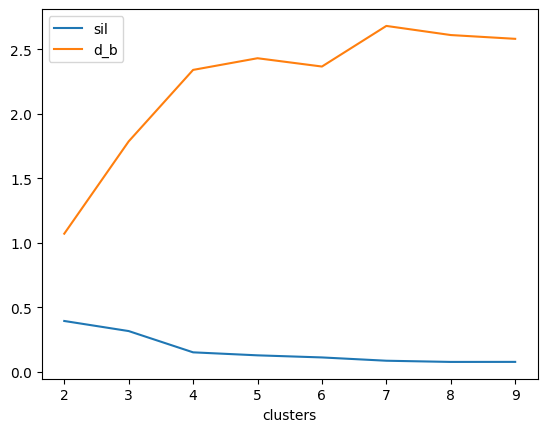

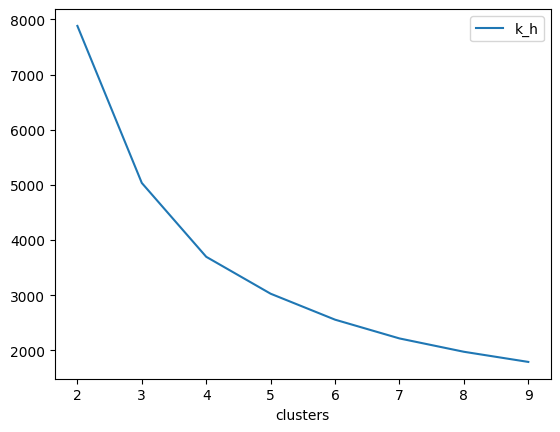

In [53]:
df_metrics.plot(y=['sil', 'd_b'], x='clusters')
df_metrics.plot(y=['k_h'], x='clusters')

In [59]:
k_m = cluster.KMeans(n_clusters=6, random_state=42, init='random')
k_m.fit(X_norm)
print(round(metrics.homogeneity_score(df_y[0], k_m.labels_),2))
print(round(metrics.completeness_score(df_y[0], k_m.labels_),2))
print(round(metrics.adjusted_rand_score(df_y[0], k_m.labels_),2))

0.54
0.58
0.42


In [65]:
df_sravn = pd.DataFrame()
df_sravn['k_m'] = k_m.labels_
df_sravn['y_fact'] = np.array(df_y[0])
df_sravn

,k_m,y_fact
0,1,5
1,1,5
2,1,5
3,1,5
4,1,5
...,...,...
10294,2,2
10295,2,2
10296,2,2
10297,2,2


In [73]:
df_sravn.groupby(['y_fact', 'k_m'])['y_fact'].agg('count')

y_fact  k_m
1       2       903
        3        78
        4       741
2       2      1242
        3         5
        4       295
        5         2
3       2       321
        3       196
        4       889
4       0        91
        1      1238
        2         1
        5       447
5       1      1346
        5       560
6       0      1556
        1        54
        2         5
        5       329
Name: y_fact, dtype: int64

1 — ходьба;
2 — подъём;
3 — спуск;
4 — сидение;
5 — стояние;
6 — лежание.

In [74]:
k_m = cluster.KMeans(n_clusters=2, random_state=42, init='random')
k_m.fit(X_norm)
df_sravn = pd.DataFrame()
df_sravn['k_m'] = k_m.labels_
df_sravn['y_fact'] = np.array(df_y[0])
df_sravn.groupby(['y_fact', 'k_m'])['y_fact'].agg('count')

y_fact  k_m
1       0      1722
2       0      1536
        1         8
3       0      1406
4       0         3
        1      1774
5       1      1906
6       0        12
        1      1932
Name: y_fact, dtype: int64

In [77]:
round(metrics.completeness_score(df_y[0], k_m.labels_),2)

0.98

In [79]:
aglom = cluster.AgglomerativeClustering(n_clusters=2)
aglom.fit(X_norm)
round(metrics.completeness_score(df_y[0], aglom.labels_),2)

1.0